In [1]:
!pip install  --upgrade diffusers transformers -q

In [27]:
from diffusers import StableDiffusionPipeline
import torch

# Configuration class
class CFG:
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = 'CompVis/stable-diffusion-v1-4'  # Ensure to use a valid model

# Load the model
model_id = CFG.image_gen_model_id
pipe = StableDiffusionPipeline.from_pretrained(model_id, variant="fp16",torch_dtype=torch.float16)
pipe = pipe.to(CFG.device)

# Function to generate image
def generate_image(prompt, model):
    image = model(
        prompt,
        num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator,
        guidance_scale=7.5  # Adjust as needed
    ).images[0]
    return image

# Generate and display the image
image = generate_image('black cat with red eyes', pipe)


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

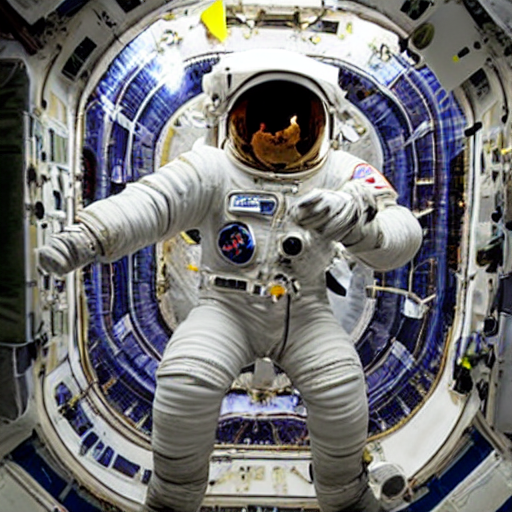

In [29]:
generate_image('Astronaut in space station', pipe)
